# IonQ Thruster

In [1]:
import os
from qiskit import QuantumCircuit, transpile
from qiskit_ionq import IonQProvider
from qiskit.visualization import plot_histogram
from custom_transpiler import IonQ_Transpiler
from tester import compare_circuits, print_metrics, run_test_case
from qiskit.circuit.random import random_circuit
from qiskit.converters import circuit_to_dag


In [2]:
# Initialize the IonQ provider and backend
api_key = os.getenv("IONQ_API_KEY") or input("Enter your IonQ API key: ")
provider = IonQProvider(token=api_key)
backend = provider.get_backend("simulator", gateset="native")

## Simple example

In [3]:
custom_transpiler = IonQ_Transpiler(backend)

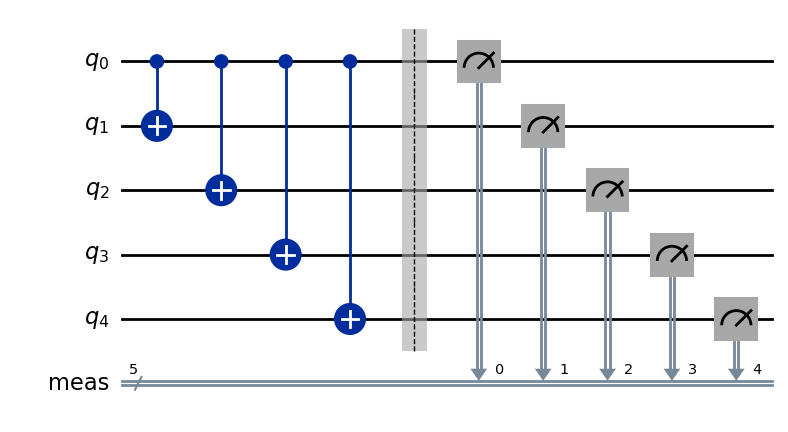

In [4]:
# Create a simple quantum circuit
qc = QuantumCircuit(5, name="cnots")
#qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(0, 3)
qc.cx(0, 4)
qc.measure_all()

qc.draw("mpl")


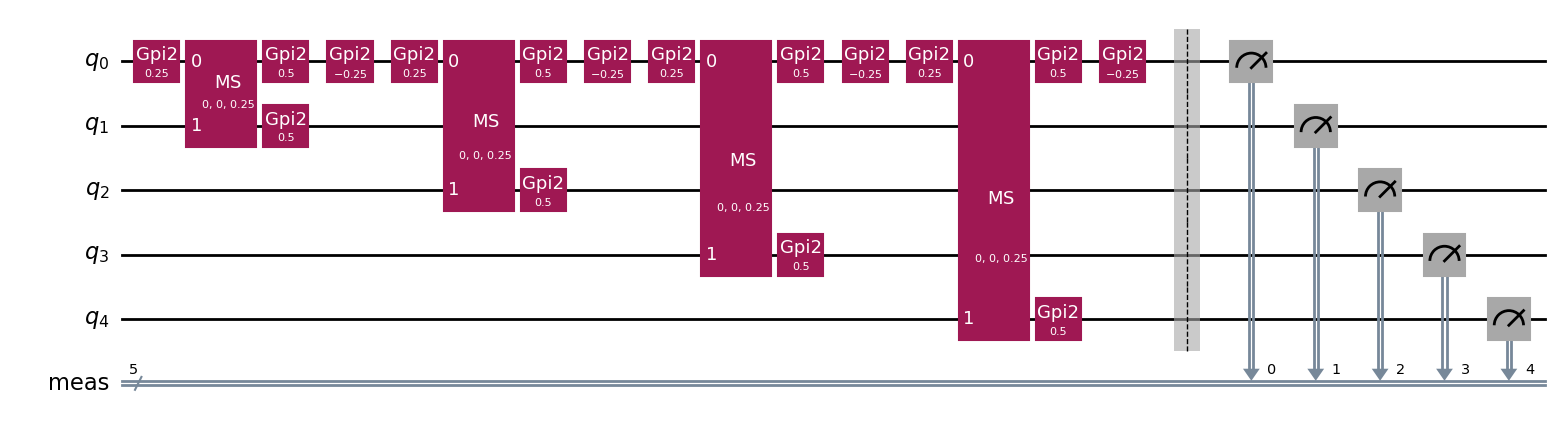

In [5]:
ibm_transpiled_circuit = transpile(qc, backend=backend, optimization_level=3)
ibm_transpiled_circuit.draw("mpl")

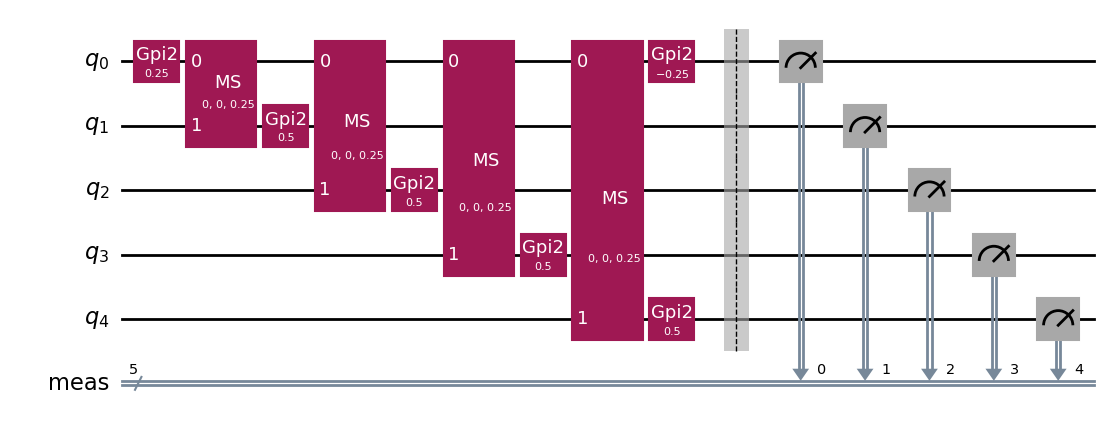

In [6]:
custom_transpiler = IonQ_Transpiler(backend)
custom_transpiled = custom_transpiler.transpile(qc)
custom_transpiled.draw("mpl")

In [7]:
# Execute the circuit
job1 = backend.run(ibm_transpiled_circuit, noise_model="aria-1", shots=1000)
job2 = backend.run(custom_transpiled, noise_model="aria-1", shots=1000)

In [8]:
# Get the result
count1 = job1.get_counts()
print(f"IBM transpiler: ", count1)

count2 = job2.get_counts()
print(f"Custom transpiler: ", count2)

IBM transpiler:  {'00000': 968, '00001': 1, '00010': 1, '00100': 1, '01000': 4, '10000': 4, '10001': 11, '11001': 6, '11101': 2, '11111': 2}
Custom transpiler:  {'00000': 963, '00001': 2, '00010': 5, '00100': 3, '01000': 4, '10000': 3, '10001': 15, '11001': 3, '11101': 2}


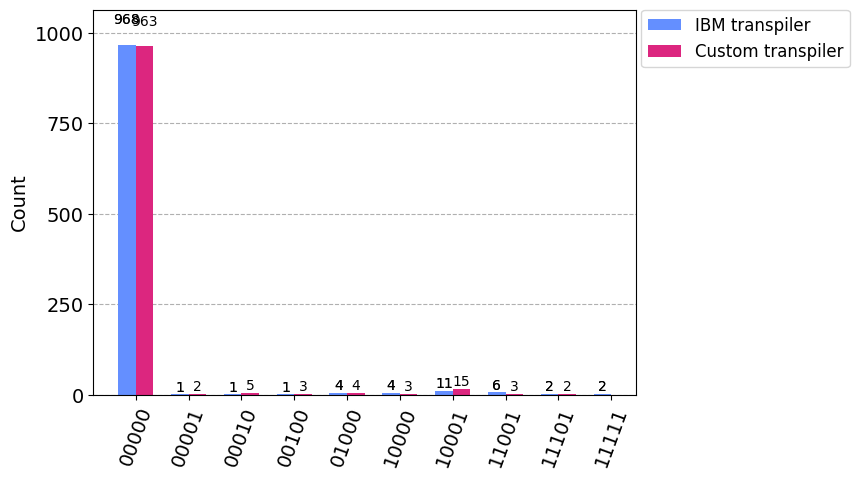

In [9]:
plot_histogram([count1, count2], legend=["IBM transpiler", "Custom transpiler"])

In [10]:
ibm_metrics, opt_metrics = compare_circuits(ibm_transpiled_circuit, custom_transpiled)

print("IBM transpiler: ")
print_metrics(ibm_metrics)

print("Custom transpiler: ")
print_metrics(opt_metrics)

The circuit size has reduced from 26 to 16
IBM transpiler: 
- Depth: 18
- Size: 26
- GPI2 Count: 16
- GPI Count: 0
- MS Count: 4
- ZZ Count: 0
Custom transpiler: 
- Depth: 8
- Size: 16
- GPI2 Count: 6
- GPI Count: 0
- MS Count: 4
- ZZ Count: 0


In [11]:
r_qc = random_circuit(4, 3, measure=True)

In [12]:
original_circuit, optimize_circuit = run_test_case(r_qc, backend)

IBM transpiled circuit:

Custom transpiled circuit:
The circuit size has reduced from 141 to 129

IBM transpiled circuit metrics:
- Depth: 68
- Size: 141
- GPI2 Count: 98
- GPI Count: 29
- MS Count: 10
- ZZ Count: 0

Custom transpiled circuit metrics:
- Depth: 66
- Size: 129
- GPI2 Count: 86
- GPI Count: 29
- MS Count: 10
- ZZ Count: 0


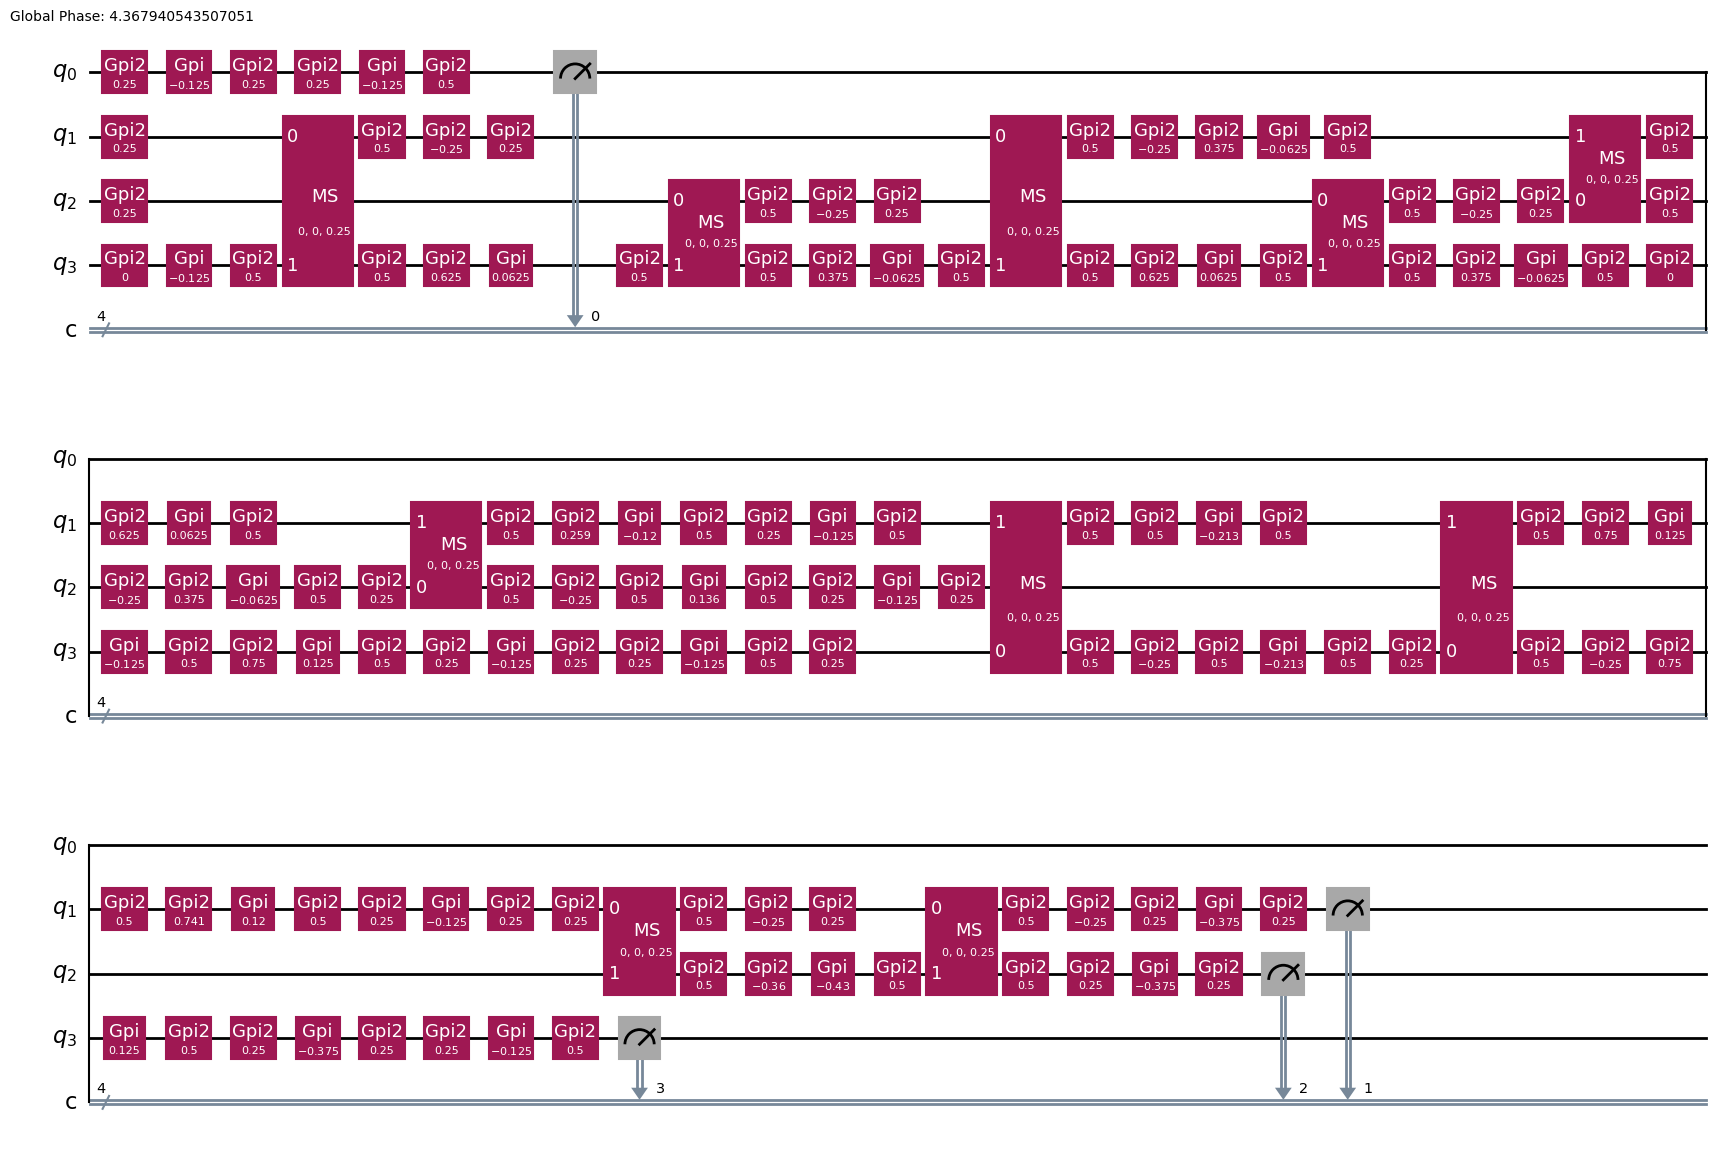

In [13]:
original_circuit.draw("mpl")

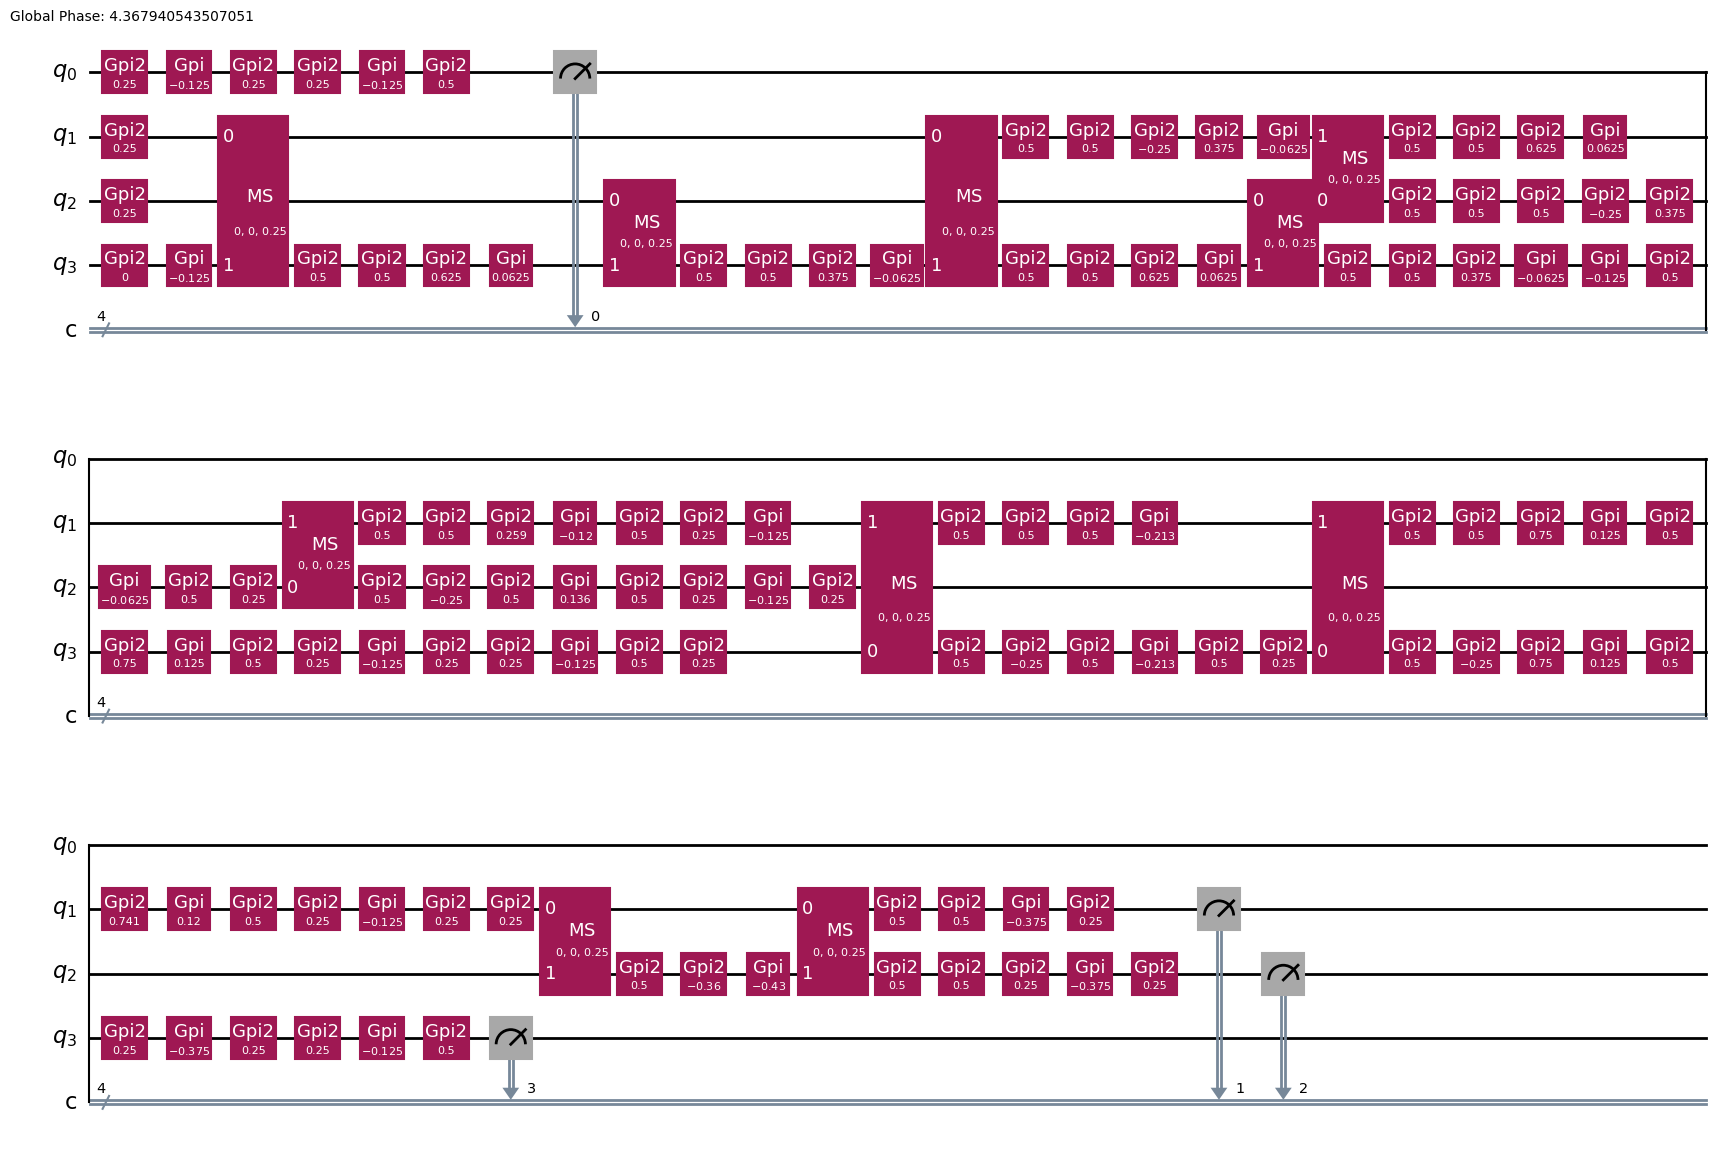

In [14]:
optimize_circuit.draw("mpl")

Original circuit:  {'0000': 139, '0001': 172, '0010': 54, '0011': 85, '0100': 184, '0101': 215, '0110': 54, '0111': 54, '1000': 6, '1001': 5, '1010': 6, '1011': 2, '1100': 13, '1101': 4, '1110': 2, '1111': 5}
Optimized circuit:  {'0000': 186, '0001': 147, '0010': 59, '0011': 47, '0100': 219, '0101': 203, '0110': 50, '0111': 39, '1000': 7, '1001': 6, '1010': 5, '1011': 5, '1100': 3, '1101': 10, '1110': 9, '1111': 5}


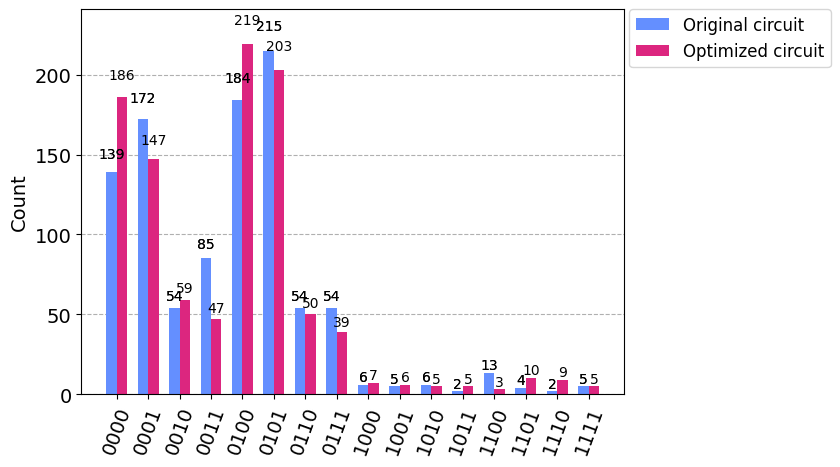

In [15]:
job3 = backend.run(original_circuit, noise_model="aria-1", shots=1000)
job4 = backend.run(optimize_circuit, noise_model="aria-1", shots=1000)

count3 = job3.get_counts()
print(f"Original circuit: ", count3)

count4 = job4.get_counts()
print(f"Optimized circuit: ", count4)

plot_histogram([count3, count4], legend=["Original circuit", "Optimized circuit"])